<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

<hr>

<a href="https://clarusway.com/"><img align="center" src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" alt="CLRSWY_LOGO" title="Open and Execute in Google Colaboratory"></a><br/>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<p style="text-align: center;"><img src="https://i.ibb.co/Vp7VhzT/stats.png" class="img-fluid" 
alt="STATS" width="600" height="200"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#0000FF; font-size:150%; text-align:center; border-radius:10px 10px;">SESSION-04 (Central Limit Theorem & Confidence Intervals)</p>

<hr>

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">Libraries Needed in this Notebook:</p>

First we must import the related libraries of Numpy, Pandas, Matplotlib and Seaborn for our analysis. We are importing the required modules by using the import keyword. 

In [1]:
import pandas as pd  # DAwPy
import numpy as np   # DAwPy
import seaborn as sns  # Stats-1 & DAwPy
import matplotlib.pyplot as plt  # Stats-1 & DAwPy

from scipy import stats
from scipy.stats import norm
from scipy.stats import t

import warnings;
warnings.filterwarnings('ignore')  # to suppress all warnings
# This imports the warnings library and suppresses warnings that might be generated during the execution of the code. 
# This can help keep the output cleaner, especially during exploratory data analysis.

## <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:center; border-radius:10px 10px;">Confidence Intervals Using the Normal Distribution</p>

**The function ``sns.get_dataset_names()`` is used in the Seaborn library to retrieve a ``list of available sample datasets``.**

In [2]:
# Get the names of the available datasets

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">1. Load "tips" dataset from Seaborn library:</p>

**The following code is used to load the ``"tips"`` dataset from the Seaborn library. This dataset contains information about restaurant tips and is commonly used for demonstrations and visualizations in data analysis.**

In [3]:
# Load the tips dataset
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- **The ``"tips"`` dataset includes the following columns:**

  - **``total_bill``**: The total bill amount.
  - **``tip``**: The tip amount given.
  - **``sex``**: The gender of the person paying the bill (Male or Female).
  - **``smoker``**: Indicates whether the person is a smoker (Yes or No).
  - **``day``**: The day of the week (Thur, Fri, Sat, Sun).
  - **``time``**: The time of day (Lunch or Dinner).
  - **``size``**: The size of the party.

**The ``sns.load_dataset("tips")`` function loads the ``"tips"`` dataset, which contains information about restaurant tips.**

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- **``Key Insights:``**
  - **``Complete Data``**: The ``"tips"`` dataset contains ``244`` entries with ``244 non-null``, indicating there are ``no missing values`` in the dataset.
  - **``Data Types``**: The dataset contains a mix of numerical (float and integer) and categorical data, which is typical for datasets that involve grouping and summarizing by categories (e.g., sex, smoker, day, time).
    - It includes three (3) numerical columns: ``total_bill`` and ``tip``, both of which are of type float64, and ``size``, which is of type int64. 
    - Additionally, there are four (4) categorical columns: ``sex``, ``smoker``, ``day``, and ``time``, all categorized as category. 
   - This structure allows for efficient storage and analysis, with a total memory usage of 7.4 KB. The dataset is well-suited for exploring relationships between tips and various factors such as gender, smoking status, day of the week, and party size.

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:</p>

In [6]:
# Check unique values in the "day" column

print(tips["day"].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


**The following code creates a bar plot to visualize the ``average total bill amount by day of the week`` using the "tips" dataset.**

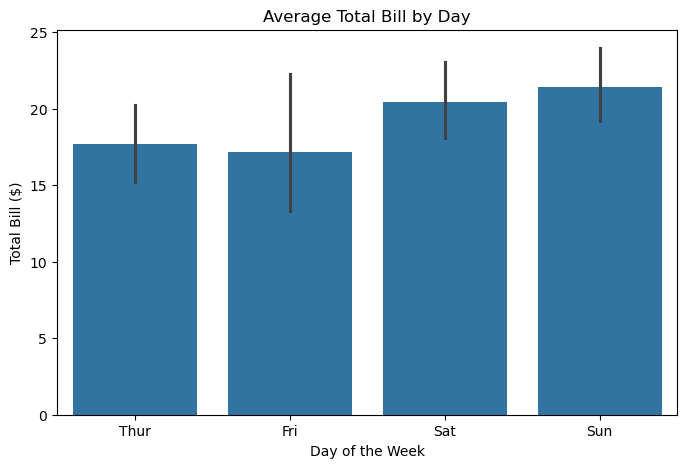

In [7]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.barplot(x="day", y="total_bill", data=tips, ci=99)  # confidence interval (CI) around the mean estimate

# Add titles and labels
plt.title("Average Total Bill by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# Show the plot
plt.show()

<hr>

- **``Bar Plot``**: The sns.barplot() function creates a bar plot where:
  - **``x="day"``** specifies the days of the week.
  - **``y="total_bill"``** specifies the total bill amounts.
  - **``data=tips``** indicates the dataset to use.
  - **``ci=99``** sets the confidence interval to 99%.
- **``Titles and Labels``**: The plot is enhanced with a title and axis labels.
- **``Show Plot``**: Finally, plt.show() displays the plot.

### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#FF0000; font-size:125%; text-align:left;"><strong>📢 DO NOT CONFUSE YOUR MIND WITH THE CODE BELOW FOR NOW. YOU WILL GET TO KNOW THE WHOLE CONCEPT AT THE END OF OUR SHARING.</strong></p>

Day: Thur, Lower Limit: 15.02, Upper Limit: 20.35
Day: Fri, Lower Limit: 11.67, Upper Limit: 22.63
Day: Sat, Lower Limit: 17.76, Upper Limit: 23.12
Day: Sun, Lower Limit: 18.73, Upper Limit: 24.09


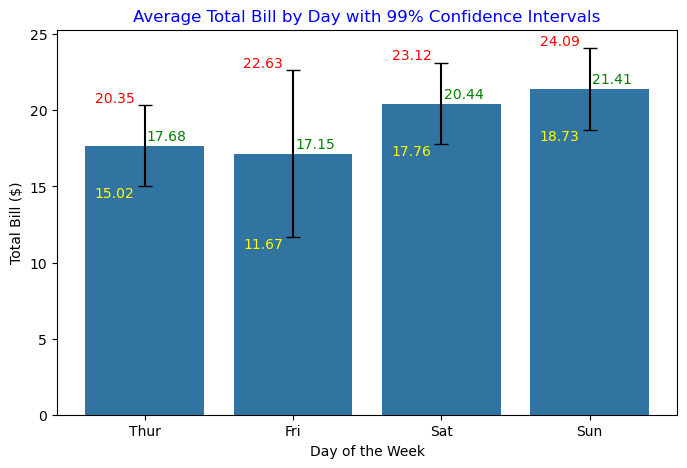

In [8]:
# Define the correct order of days
day_order = ["Thur", "Fri", "Sat", "Sun"]

# Prepare lists to store means and confidence intervals
means = []
lower_limits = []
upper_limits = []

# Calculate mean and 99% CI for each day
for day in day_order:
    day_data = tips[tips["day"] == day]["total_bill"]
    
    mean = day_data.mean()
    std_dev = day_data.std()
    n = day_data.count()
    
    # Calculate the critical value for 99% confidence level
    critical_value = stats.t.ppf(0.995, df=n-1)
    
    # Calculate the margin of error
    margin_of_error = critical_value * (std_dev / (n ** 0.5))
    
    # Calculate lower and upper limits
    lower_limit = mean - margin_of_error
    upper_limit = mean + margin_of_error
    
    # Append the calculated values to the lists
    means.append(mean)
    lower_limits.append(lower_limit)
    upper_limits.append(upper_limit)
    
    # Print the results for each day
    print(f"Day: {day}, Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")

# Create a DataFrame for plotting
ci_data = pd.DataFrame({'day': day_order,
                        'mean': means,
                        'lower': lower_limits,
                        'upper': upper_limits})

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot with error bars
ax = sns.barplot(x='day', y='mean', data=ci_data, ci=None, order=day_order)

# Add error bars
for i in range(len(ci_data)):
    plt.errorbar(i, ci_data['mean'][i], 
                 yerr=[[ci_data['mean'][i] - ci_data['lower'][i]], 
                        [ci_data['upper'][i] - ci_data['mean'][i]]], 
                 fmt='none', color='black', capsize=5)

    # Annotate the mean value on the bar
    ax.text(i+0.15, ci_data['mean'][i] + 0.15, f"{ci_data['mean'][i]:.2f}", 
            ha='center', va='bottom', color='green')

    # Annotate the lower limit
    ax.text(i - 0.2, ci_data['lower'][i], f"{ci_data['lower'][i]:.2f}", 
            ha='center', va='top', color='yellow')

    # Annotate the upper limit
    ax.text(i - 0.2, ci_data['upper'][i], f"{ci_data['upper'][i]:.2f}", 
            ha='center', va='bottom', color='red')

# Add titles and labels
plt.title("Average Total Bill by Day with 99% Confidence Intervals", color="blue")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# Show the plot
plt.show()

The ``average total bill`` for ``Thursday`` is approximately **``17.68``**. The **``lower``** and **``upper``** limits are **``15.02``** and **``20.35``**, respectively. This means that; 

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:center;"><strong>We are 99% confident that the true population mean of the "total bill" on Thursday falls between 15.02 and 20.35.</strong></p>

**``Interpretation:``**
- ``If we were to take many samples from the same population and calculate the confidence intervals for each sample, about 99% of those intervals would contain the true population mean.``
- This does NOT mean that if we guess a value between 15.02 and 20.35, we will be correct. Instead, it means that the average total bill for Thursday is likely to be within that range based on the sample data we collected.

- **``Key Points:``**
  - **``Confidence Level``**: The 99% confidence level indicates a high degree of certainty, but there is still a 1% chance that the true mean could fall outside this interval.
  - **``Sample Variability``**: The confidence interval is influenced by the sample size and variability in the data. A larger sample size generally leads to a narrower confidence interval.
  - **``Not a Guarantee``**: The confidence interval does NOT guarantee that the true mean is within that range for any single instance; it represents our uncertainty based on sample data.

- **``Conclusion:``**
  - In summary, the confidence interval gives you a range where you can expect the true mean of total bill for Thursday to lie with 99% confidence. It reflects the uncertainty of your estimate based on the data you have, rather than a specific prediction for any individual observation.

<hr>

Interpreting error bars based on a confidence interval (CI) is important for understanding the ``reliability of your estimates`` in data visualization. Here’s how to interpret them:

- **``1. Understanding Confidence Intervals:``**
  - **``Confidence Interval``**: A confidence interval gives a range of values that is likely to contain the population parameter (e.g., the true mean) with a certain level of confidence (e.g., 95% or 99%).
  - **``Interpretation``**: If you have a 99% confidence interval, this means that if you were to take many samples and compute the interval for each sample, approximately 99% of those intervals would contain the true population mean.
- **``2. Error Bars in Bar Plots"``**
  - **``Error Bars``**: In bar plots, error bars often represent the ``confidence interval (CI) around the mean estimate``.
  - **``Length of Error Bars``**: 
    - If the ``error bars`` are **``short``**, it suggests a ``more`` **``precise``** ``estimate of the mean``**. 
    - **``Longer``** ``error bars``** indicate ``greater`` **``uncertainty``** ``about the mean``.
- **``3. Using Error Bars to Compare Groups:``**
  - **``Overlap of Error Bars``**: If the error bars of ``two groups overlap`` significantly, it suggests that there ``may NOT be a statistically significant difference between the groups``. Conversely, if the error bars do ``NOT overlap``, this may indicate a ``significant difference``.
    - Example: If Group A has an average with error bars from 10 to 15 and Group B has error bars from 12 to 18, they overlap between 12 and 15, indicating potential similarity.
    - Example: If Group A's error bars range from 10 to 15 and Group B's range from 16 to 22, they do NOT overlap, indicating a likely significant difference.
      - ``Thursday's Error Bars``: Extend from \$15.02 \to  \$20.35.
      - ``Friday's Error Bars``: Extend from \$11.67 \to  \$22.63.
        - ``Overlapping Scenario``:
        - In this case, the error bars for Thursday and Friday overlap between $15 and $22. This suggests that there may not be a statistically significant difference in the average total bills between these two days. The overlapping region indicates that the means could be similar, implying that customer spending on Thursday and Friday may not differ significantly. Further statistical testing would be necessary to confirm this observation.
        - ``Not Overlapping Scenario``:
        - If the error bars had not overlapped, for example, if Thursday's error bars went from $15 to $22 and Friday's extended from $23 to $24, this would indicate a likely significant difference in average total bills between the two days. The lack of overlap would suggest that the average total bill on Friday is consistently higher than that on Thursday, indicating a potential change in customer behavior or spending patterns.
  - **``Statistical Significance``**: Always complement visual interpretations with statistical tests (like t-tests) to confirm differences between groups.
- **``4. Practical Example"``**
  - **``In your bar plot of average total bills by day``**:
  - If you see that the error bars for Monday and Tuesday do NOT overlap, this suggests a statistical difference in average total bills between those days.
  - If the error bars for Saturday and Sunday overlap significantly, it indicates that the average total bills for those days might NOT be significantly different.
- **``Summary:``**
  - Error bars based on confidence intervals provide a visual representation of the uncertainty around the mean estimates. They help to assess the reliability of comparisons between groups and to interpret potential differences in data. Always consider statistical testing to complement your visual findings.

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">3. Subset a dataframe just including Sunday tips:</p>

In [9]:
# Filter the dataset for entries where the day is "Sunday"
tipsSun = tips[tips['day'] == "Sun"]

# Display the first few rows of the filtered dataset
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- **``Filtering``**: The line ``tips[tips['day'] == "Sun"]`` filters the dataset to ``include only the rows`` ``where the 'day' column is equal to "Sun"``. This creates a new DataFrame called ``"tipsSun``".

In [10]:
tipsSun.describe()

,total_bill,tip,size
count,76.000000,76.000000,76.000000
mean,21.410000,3.255132,2.842105
std,8.832122,1.234880,1.007341
min,7.250000,1.010000,2.000000
25%,14.987500,2.037500,2.000000
50%,19.630000,3.150000,2.000000
75%,25.597500,4.000000,4.000000
max,48.170000,6.500000,6.000000


#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">4. Calculate mean and std:</p>

In [11]:
# Calculate the mean of the total bill for Sundays
average_total_bill_sun = tipsSun["total_bill"].mean()

# Print the result
print(f"Average Total Bill on Sunday: ${average_total_bill_sun:.2f}")

Average Total Bill on Sunday: $21.41


- **``Mean Calculation``**: The ``mean()`` function ``computes the average of the "total_bill" column`` in the "tipsSun" DataFrame.

In [12]:
# Get the shape of the tipsSun DataFrame
shape_tipsSun = tipsSun.shape

# Print the result
print(f"Shape of tipsSun DataFrame: {shape_tipsSun}")

Shape of tipsSun DataFrame: (76, 7)


- **``Shape``**: The ``shape attribute`` returns ``a tuple representing the dimensions of the DataFrame``: (``number of rows``, ``number of columns``).

In [13]:
# Calculate the standard deviation of the total bill for Sundays
std_total_bill_sun = tipsSun["total_bill"].std()

# Print the result
print(f"Standard Deviation of Total Bill on Sunday: ${std_total_bill_sun:.2f}")

Standard Deviation of Total Bill on Sunday: $8.83


- **``Standard Deviation Calculation``**: The ``std()`` function ``computes the standard deviation of the "total_bill"`` column in the tipsSun DataFrame.

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">5. Calculate standard error of the mean (sem):</p>

- The ``Standard Error of the Mean (SEM)`` is a statistical measure that **``quantifies the amount of variability or dispersion of sample means around the true population mean``**. It provides an estimate of how much the sample mean is expected to fluctuate from the true population mean if you were to take multiple samples.

**[What Is the Standard Error of the Mean (SEM)?](https://www.indeed.com/career-advice/career-development/standard-error-mean)**

**[Standard Error of the Mean (SEM)](https://statisticsbyjim.com/hypothesis-testing/standard-error-mean/)**

- **``Key Points About SEM:``**
  - **``Definition``**:
    - SEM is calculated as the standard deviation (SD) of the sample divided by the square root of the sample size (n):

<img src=https://i.ibb.co/WgqgQmh/sd.png width="200" height="200">
<img src=https://i.ibb.co/1XkTmQb/sem.png width="250" height="200">

- **``Purpose``**:
   - SEM indicates the precision of the sample mean as an estimate of the population mean. A ``smaller SEM`` suggests that the sample mean is a ``more accurate`` reflection of the true population mean.

- **``Relationship to Sample Size``**:
   - The ``SEM decreases`` as the ``sample size increases``. This is because larger samples provide more information about the population, leading to ``more precise estimates`` of the mean.

- **``Use in Confidence Intervals``**:
   - ``SEM`` is often used to ``calculate confidence intervals`` for the mean. The ``margin of error in confidence intervals is derived from SEM``, which reflects the ``uncertainty`` of the sample mean.

- **``Different from Standard Deviation``**:
   - While the standard deviation measures the ``spread of individual data points`` in a sample, SEM measures the ``spread of sample means``.

In [14]:
# Calculate the standard error of the mean (SEM)
sem = std_total_bill_sun / np.sqrt(tipsSun.shape[0])
# sem = tipsSun["total_bill"].std() / np.sqrt(tipsSun.shape[0])

# Print the result
print(f"Standard Error of the Mean (SEM) for Total Bill on Sunday: ${sem:.10f}")

Standard Error of the Mean (SEM) for Total Bill on Sunday: $1.0131138555


**To calculate the standard error of the mean (SEM) directly for the "total_bill" column in the tipsSun DataFrame using the sem() method, you can use the following code:**

In [15]:
# Calculate the standard error of the mean (SEM) for total bill on Sundays
sem = tipsSun["total_bill"].sem()

# Print the result
print(f"Standard Error of the Mean (SEM) for Total Bill on Sunday: ${sem:.10f}")

Standard Error of the Mean (SEM) for Total Bill on Sunday: $1.0131138555


- **``Standard Error Calculation``**: The ``sem()`` method computes the standard error of the mean for the "total_bill" column directly.

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">6. Calculate the margin of error (99%):</p>

- The margin of error is a statistic that expresses the amount of random sampling error in a survey's results. It provides a range within which the true value (such as a population mean or proportion) is expected to fall, based on the sample data.

- **``Key Points About Margin of Error:``**
  - **``Definition``**:
The margin of error indicates the maximum expected difference between the sample estimate (e.g., sample mean) and the true population parameter. It is typically expressed as a plus-or-minus figure (±).
  - **``Calculation``**:
The margin of error can be calculated using the formula:

<img src=https://i.ibb.co/DknhvGz/moe.png width="200" height="200">

  - **``Critical Value``**: This is derived from the desired confidence level (e.g., 1.96 for 95% confidence when using the normal distribution).
  - **``Standard Error (SE)``**: This is the standard deviation of the sample mean, which quantifies the variability of the sample mean.
- **``Interpretation``**:
  - If a poll reports a candidate has 50% support with a margin of error of ±3%, it means the true support level is likely between 47% and 53%.
- **``Factors Affecting Margin of Error``**:
  - **``Sample Size``**: A larger sample size generally reduces the margin of error because it provides a better estimate of the population.
  - **``Confidence Level``**: A higher confidence level (e.g., 99% vs. 95%) increases the critical value, which in turn increases the margin of error.
- **``Use in Research``**:
The margin of error is commonly used in surveys, polls, and experiments to indicate the reliability of estimates. It helps readers understand the potential range of uncertainty in the results.

In [16]:
# Calculate the margin of error (MOE)
moe = 2.576 * sem

# Print the result
print(f"Margin of Error (MOE) for Total Bill on Sunday: ${moe:.10f}")

Margin of Error (MOE) for Total Bill on Sunday: $2.6097812918


- **``Margin of Error Calculation``**: The MOE is calculated by multiplying the SEM by the z-score for a 99% confidence level (2.576).

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">7. Calculate the upper confidence limit:</p>


<img src=https://i.ibb.co/rpzg7MM/ci.png width="450" height="200">

<img src=https://i.ibb.co/tpfSzrY/ci1.png width="450" height="200">

**To calculate the upper limit of the confidence interval for the average total bill on Sundays, you can use the following code:**

In [17]:
# Calculate the upper limit of the confidence interval
upper_lim = tipsSun["total_bill"].mean() + moe

# Print the result
print(f"Upper Limit of the Confidence Interval for Total Bill on Sunday: ${upper_lim:.10f}")

Upper Limit of the Confidence Interval for Total Bill on Sunday: $24.0197812918


- **``Upper Limit Calculation``**: The upper limit of the confidence interval is calculated by adding the MOE-Margin of Error to the mean of the ``"total_bill"`` column.

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">8. Calculate the lower confidence limit:</p>

**To calculate the lower limit of the confidence interval for the average total bill on Sundays, you can use the following code:**

In [18]:
# Calculate the lower limit of the confidence interval
low_lim = tipsSun["total_bill"].mean() - moe

# Print the result
print(f"Lower Limit of the Confidence Interval for Total Bill on Sunday: ${low_lim:.10f}")

Lower Limit of the Confidence Interval for Total Bill on Sunday: $18.8002187082


- **``Lower Limit Calculation``**: The lower limit of the confidence interval is calculated by subtracting the MOE from the mean of the ``"total_bill"`` column.

In [19]:
# help(stats.norm.interval)

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">9. Calculate 99% Confidence Interval around the mean by using scipy.stats:</p>

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the **``norm.interval()``** function from the scipy.stats library.

**[Statistical Tests in Scipy Library](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)**

**To calculate the 99% confidence interval using the normal distribution and the mean and standard error of the total bill for Sundays, you can use the stats.norm.interval function from the scipy library.**

In [20]:
# Calculate the mean of the total bill
mean_total_bill = tipsSun["total_bill"].mean()

# Calculate the 99% confidence interval
ci_z = stats.norm.interval(0.99, loc=mean_total_bill, scale=sem)

# Print the result
print(f"99% Confidence Interval for Total Bill on Sunday: {ci_z}")

99% Confidence Interval for Total Bill on Sunday: (18.800391643166037, 24.019608356833963)


In [21]:
print(f"Average Total Bill on Sunday: ${average_total_bill_sun:.2f}")

Average Total Bill on Sunday: $21.41


In [22]:
(18.800391643166037 + 24.019608356833963)/2

21.41

- **``Mean Calculation``**: The mean of the ``"total_bill"`` column is computed.
- **``Confidence Interval Calculation``**: The ``stats.norm.interval()`` function computes the confidence interval for the normal distribution, given the confidence level (0.99), the mean, and the SEM.

**To calculate the 99% confidence interval using the t-distribution for the average total bill on Sundays, you can use the stats.t.interval function from the scipy library.**

In [23]:
# Calculate the 99% confidence interval using the t-distribution
ci_t = stats.t.interval(0.99, 
                        len(tipsSun["total_bill"]) - 1, 
                        loc=mean_total_bill,
                        scale=sem)

# Print the result
print(f"99% Confidence Interval (t-distribution) for Total Bill on Sunday: {ci_t}")

99% Confidence Interval (t-distribution) for Total Bill on Sunday: (18.73235723864247, 24.08764276135753)


- **``Confidence Interval Calculation``**: The ``stats.t.interval()`` function computes the confidence interval for the t-distribution, given the confidence level (0.99), degrees of freedom (length of the sample minus one), the mean, and the SEM.

**To visualize the 99% confidence interval for the average total bill on Sundays along with a bar plot of total bills by day, you can use the following code:**

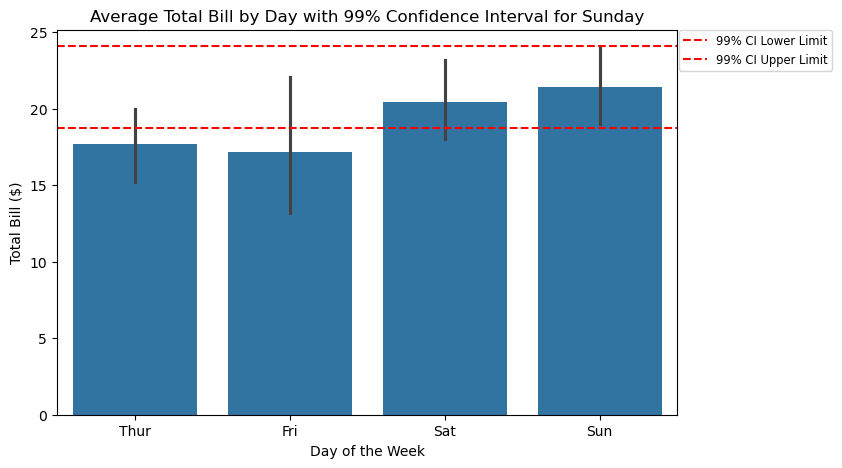

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tips' DataFrame and 'ci_t' are already defined
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot for total bills by day
sns.barplot(x="day", y="total_bill", data=tips, ci=99)

# Draw horizontal lines for the confidence interval
plt.axhline(y=ci_t[0], color='r', ls='--', label='99% CI Lower Limit')
plt.axhline(y=ci_t[1], color='r', ls='--', label='99% CI Upper Limit')

# Add titles and labels
plt.title("Average Total Bill by Day with 99% Confidence Interval for Sunday")
plt.xlabel("Day of the Week")
plt.ylabel("Total Bill ($)")

# Adjust legend position to upper right outside the chart
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='small', borderaxespad=0.)

# Show the plot
plt.show()

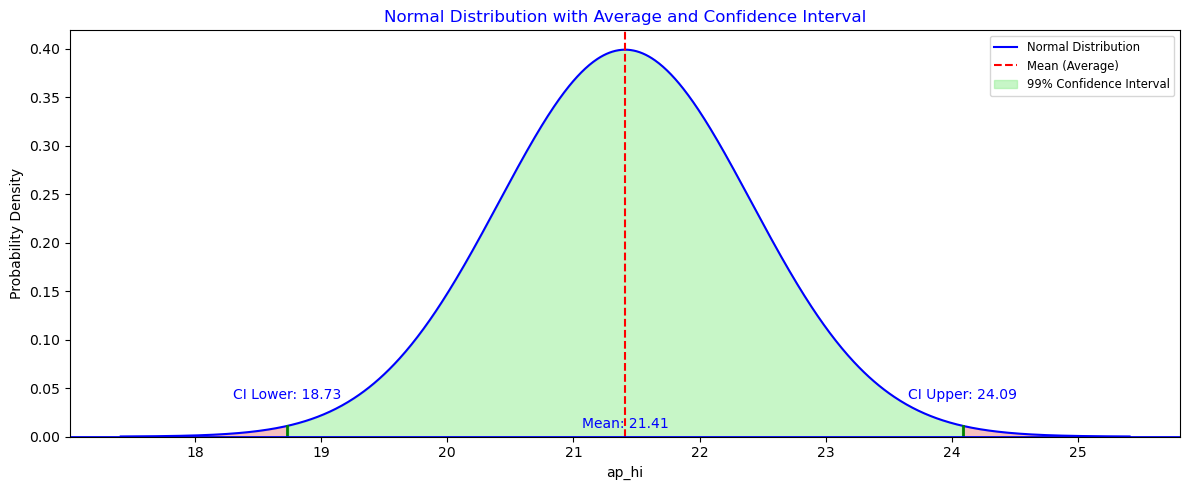

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given values
mean = 21.41
ci_lower = 18.73235723864247
ci_upper = 24.08764276135753

# Define the standard deviation (assumed for demonstration purposes)
std_dev = 1  # You can adjust this based on your data

# Create a range of x values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)

# Calculate the normal distribution
y = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(12, 5))
plt.plot(x, y, label='Normal Distribution', color='blue')

# Mark the average
plt.axvline(mean, color='red', linestyle='--', label='Mean (Average)', ymin=0, ymax=1)

# Mark the confidence interval
plt.plot([ci_lower, ci_lower], [0, norm.pdf(ci_lower, mean, std_dev)], color='green', linewidth=2)
plt.plot([ci_upper, ci_upper], [0, norm.pdf(ci_upper, mean, std_dev)], color='green', linewidth=2)

# Fill the area between the confidence interval lines with light green
plt.fill_between(x, 0, y, where=(x >= ci_lower) & (x <= ci_upper), color='lightgreen', alpha=0.5, label='99% Confidence Interval')

# Fill the tails with light red
plt.fill_between(x, 0, y, where=(x < ci_lower), color='lightcoral', alpha=0.5)
plt.fill_between(x, 0, y, where=(x > ci_upper), color='lightcoral', alpha=0.5)

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Adding titles and labels
plt.title('Normal Distribution with Average and Confidence Interval', color='blue')
plt.xlabel('ap_hi')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Add mean and confidence interval values to the chart
plt.text(mean, 0.02, f'Mean: {mean:.2f}', color='blue', fontsize=10, ha='center', va='top')
plt.text(ci_lower, 0.05, f'CI Lower: {ci_lower:.2f}', color='blue', fontsize=10, ha='center', va='top')
plt.text(ci_upper, 0.05, f'CI Upper: {ci_upper:.2f}', color='blue', fontsize=10, ha='center', va='top')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Adjust x-axis tick labels
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Remove grids
plt.grid(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:175%; text-align:left; border-radius:10px 10px;">10. Bulb Example from Slides:</p>

- Strike Corporation manufactures light bulbs. 
  - Mr. Edwin Davis, the CEO of company,  claims that an average Acme light bulb lasts 300 days. 
- Matthew Connor, a researcher, randomly selects 15 bulbs for testing. The ``sampled bulbs`` last an average of 290 days, with a standard deviation of 50 days. 
- If the CEO's claim were true, **``what is the probability that 15 randomly selected bulbs would have an average life of no more than 290 days?``**

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; ">Calculation:</p>

**The following code performs a statistical analysis to evaluate the claim above about a population mean using a sample.**

- The code essentially tests;
  - ``whether the observed sample mean (x_bar = 290) is significantly different from the claimed (true) population mean (mu = 300)``. 
 - It calculates the standard error, the t-value, and the cumulative probability for the t-distribution to assess how likely it is to observe such a sample mean under the assumption that the population mean is indeed 300.
<hr>

#### <p style="background-color:#FFFFFF; font-family:newtimeroman; color:#0000FF; font-size:125%; text-align:left;"><strong>Why t-distribution?</strong></p>

- In this scenario, we use the t-distribution rather than the normal distribution for a few key reasons:

  - **``Small Sample Size:``**
    - The ``sample size`` here is ``15``, which is ``less than 30``. When sample sizes are small, the t-distribution is more appropriate because it accounts for the additional variability that can occur in smaller samples.
  - **``Unknown Population Standard Deviation:``**
    - The ``population standard deviation`` is ``unknown``. Instead, we are using the ``sample standard deviation`` (``50`` days) to estimate the variability of the sample mean. The t-distribution is designed to handle this uncertainty.

In [26]:
# Given data
mu = 300        # Population mean (CEO's claim)
x_bar = 290     # Sample mean
s = 50          # Sample standard deviation
n = 15          # Sample size

# Step 1: Calculate the standard error (SE)
SE = s / np.sqrt(n)

# Step 2: Calculate the t-value
t_value = (x_bar - mu) / SE

# Step 3: Calculate degrees of freedom
df = n - 1

# Step 4: Calculate the CDF for the calculated t-value
probability = t.cdf(t_value, df)

# Output results
print(f"Standard Error (SE): {SE:.2f}")
print(f"Calculated t-value: {t_value:.3f}")
print(f"Probability (CDF) of having an average life of no more than {x_bar} days: {probability:.4f}")

Standard Error (SE): 12.91
Calculated t-value: -0.775
Probability (CDF) of having an average life of no more than 290 days: 0.2257


**The following code ``calculates the cumulative distribution function (CDF)`` for a given ``t-value`` with specified degrees of freedom.**

- The code computes the probability that a t-distributed random variable (with 14 degrees of freedom) takes a value less than or equal to -0.775. 
- The result can be useful in hypothesis testing to determine significance levels or to understand the behavior of the t-distribution in relation to the calculated t-value.
<hr>

📌📢❗🚨- The **``Cumulative Distribution Function (CDF)``** is a fundamental concept in statistics that describes the ``probability`` that ``a random variable takes on a value less than or equal to a given value``. In the context of the t-distribution (or any probability distribution), the CDF provides the **``cumulative probability up to a specific t-score``**.

- **``Understanding the CDF:``**
  - **``Definition``**: The CDF, denoted as F(t), gives the probability that a random variable T(following a t-distribution) is less than or equal to a specific value t:
    - F(t) = P(T≤t)

- **``Interpretation:``**
  - If you calculate a t-score (e.g., t=−0.775), the CDF will tell you the probability of observing a t-value less than or equal to −0.775 based on the t-distribution with a specific degree of freedom (e.g., df=14).
    - For example, if F(−0.775)=0.22, it means there is a 22% probability that a randomly selected sample mean would be less than or equal to 290 days, assuming the true mean is 300 days.

- **``Usage in Hypothesis Testing:``**
  - In hypothesis testing, the CDF is used to determine the p-value. The p-value helps you decide whether to reject the null hypothesis.
  - If the p-value (from the CDF) is less than the significance level (e.g., α=0.05), you would reject the null hypothesis.

In [27]:
# Parameters
t_value = -0.775
df = 14

# Calculate CDF
probability = t.cdf(t_value, df)
print(probability)

0.2256159291769475


- If ``F(−0.775)=0.22``, it means there is a ``22% probability`` that a ``randomly selected sample mean would be less than or equal to 290 days``, assuming the true mean is 300 days.

#### <p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:150%; text-align:left; ">Visualization of the results:</p>

**The following code generates visualizations for the probability density function (PDF) and cumulative distribution function (CDF) of a standard normal distribution (mean = 0, standard deviation = 1). It also highlights a specific t-value on both plots.**

- This code visualizes the PDF and CDF of a standard normal distribution, highlighting the area corresponding to a specific t-value. 
- The PDF plot shows the density of the distribution, while the CDF plot shows the cumulative probability up to that t-value. This can be useful for statistical analysis and hypothesis testing.

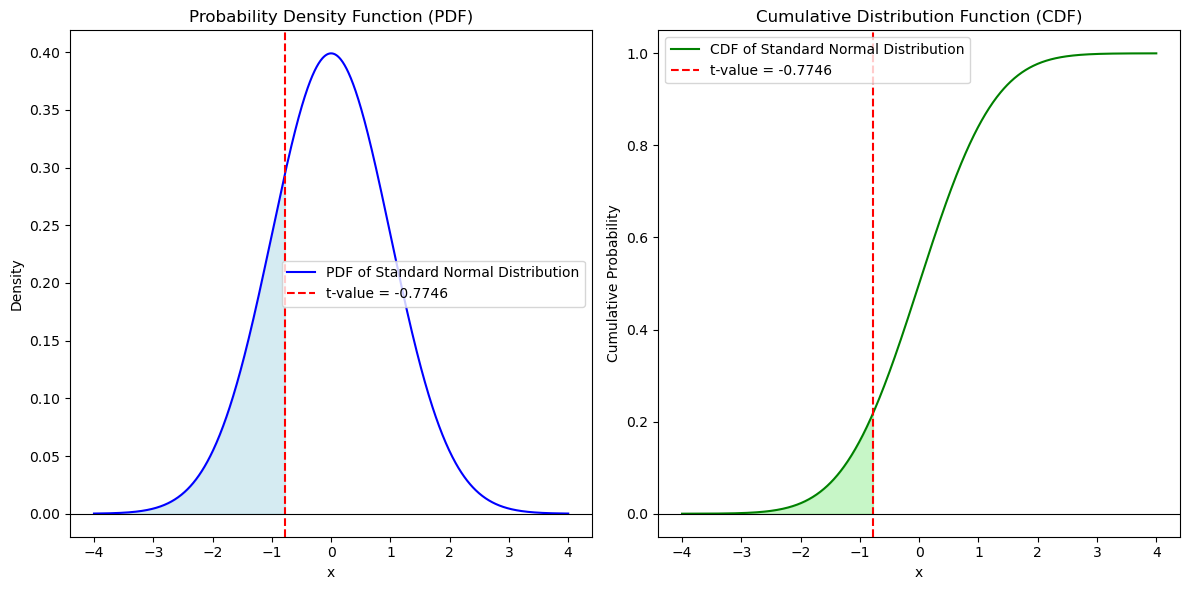

In [28]:
# Define the parameters for the normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Create an array of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the PDF and CDF for the normal distribution
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Define the t-value
t_value = -0.7745966

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF of Standard Normal Distribution', color='blue')
plt.fill_between(x, pdf, where=(x <= t_value), color='lightblue', alpha=0.5)
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('Density')
plt.axvline(t_value, color='red', linestyle='--', label=f't-value = {t_value:.4f}')
plt.axhline(0, color='black', linestyle='-', linewidth=0.8)  # Horizontal line at y=0
plt.legend()
plt.grid(False)  # Remove grid lines

# Plot the CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF of Standard Normal Distribution', color='green')
plt.fill_between(x, cdf, where=(x <= t_value), color='lightgreen', alpha=0.5)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.axvline(t_value, color='red', linestyle='--', label=f't-value = {t_value:.4f}')
plt.axhline(0, color='black', linestyle='-', linewidth=0.8)  # Horizontal line at y=0
plt.legend()
plt.grid(False)  # Remove grid lines

# Show the plots
plt.tight_layout()
plt.show()

**The following code creates a visualization of the cumulative distribution function (CDF) for a standard normal distribution, highlighting a specific t-value.**

- This code visualizes the CDF of a standard normal distribution and highlights the cumulative probability associated with a specified t-value. 
- The area under the curve to the left of the t-value is filled, providing a clear visual representation of the probability up to that point.

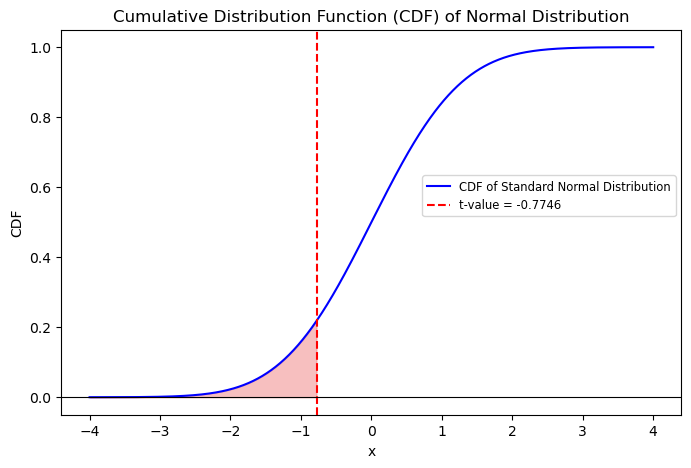

In [29]:
# Define the parameters for the normal distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Create an array of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the CDF for the normal distribution
cdf = norm.cdf(x, mu, sigma)

# Define the t-value
t_value = -0.7745966

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, cdf, label='CDF of Standard Normal Distribution', color='blue')

# Add a vertical line for the t-value
plt.axvline(t_value, color='red', linestyle='--', label=f't-value = {t_value:.4f}')

# Highlight the area under the curve to the left of the t-value
plt.fill_between(x, cdf, where=(x <= t_value), color='lightcoral', alpha=0.5)

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='-', linewidth=0.8)

# Add labels and title
plt.title('Cumulative Distribution Function (CDF) of Normal Distribution')
plt.xlabel('x')
plt.ylabel('CDF')

# Adjust legend position and font size
plt.legend(loc='lower right', fontsize='small', bbox_to_anchor=(1, 0.5))  # Adjust position and font size
plt.grid(False)  # Remove grid lines

# Show the plot
plt.show()

### 🎬 🎥 COMING NEXT EPISODE:

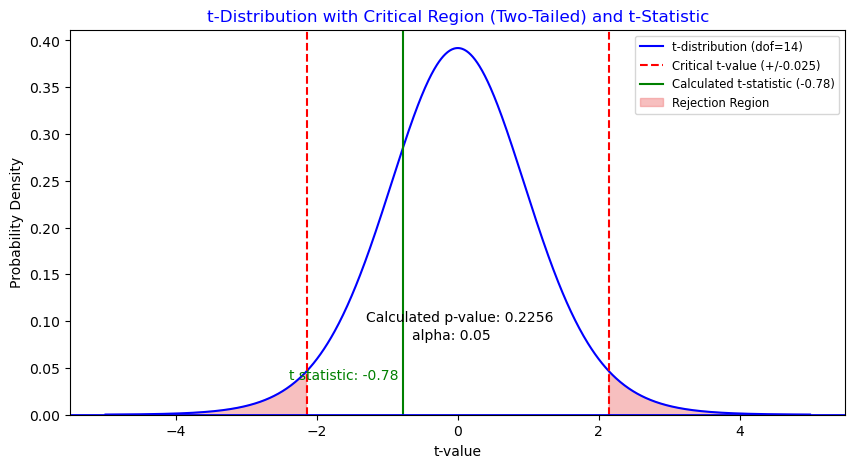

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given values from your t-test
t_statistic = -0.775
p_value = 0.2256159291769475
dof = 14
alpha = 0.05

# Define the range for the t-distribution plot
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution
y = t.pdf(x, dof)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the t-distribution
plt.plot(x, y, label=f't-distribution (dof={dof})', color='blue')

# Mark the critical t-values for alpha/2 (two-tailed test)
t_critical_positive = t.ppf(1 - alpha/2, dof)
t_critical_negative = -t_critical_positive
plt.axvline(t_critical_positive, color='red', linestyle='--', label=f'Critical t-value (+/-{alpha/2})')
plt.axvline(t_critical_negative, color='red', linestyle='--')

# Mark the calculated t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', label=f'Calculated t-statistic ({t_statistic:.2f})')

# Add a blue horizontal line at the bottom of the distribution
plt.axhline(0, color='blue', linestyle='-', linewidth=2)

# Fill the rejection regions with light red
plt.fill_between(x, 0, y, where=(x <= t_critical_negative) | (x >= t_critical_positive), color='lightcoral', alpha=0.5, label='Rejection Region')

# Add text for p-value and alpha
plt.text(-1.3, 0.1, f'Calculated p-value: {p_value:.4f}', fontsize=10)
plt.text(-0.65, 0.08, f'alpha: {alpha}', fontsize=10)
plt.text(t_statistic-0.85, 0.05, f't statistic: {t_statistic:.2f}', color='green', fontsize=10, ha='center', va='top')

# Add titles and labels
plt.title('t-Distribution with Critical Region (Two-Tailed) and t-Statistic', color='blue')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend(fontsize='small')

# Set y-axis limit to start from zero
plt.ylim(bottom=0)

# Remove grids
plt.grid(False)

# Show the plot
plt.show()


- **``Critical Values``**: ``t_critical_positive`` and ``t_critical_negative`` are calculated using t.ppf(1 - alpha/2, dof) and -t_critical_positive, respectively. These values mark the cutoff points for the upper and lower tails of the distribution based on the significance level (alpha).

- **``Rejection Region``**: The area between t_critical_negative and t_critical_positive is filled with light red (color='lightcoral') to indicate the rejection region for the null hypothesis.

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#E51A59; font-size:150%; text-align:center; border-radius:10px 10px;">End of the Session - 04</p>

<p style="text-align: center;"><img src="https://i.ibb.co/TtRtYNn/healthy-lunch.jpg" width="800" height="200" class="img-fluid" alt="Lunch Time"></p>


<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>


<br><br><br>

<p style="text-align: center;"><img src="https://i.ibb.co/Rpz9L36/clarusway-logo-black.png" width="450" height="200" class="img-fluid" alt="CLRSWY_LOGO"></p>

<p style="background-color:#E51A59; font-family:newtimeroman; color:#FDFEFE; font-size:130%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>